# Análisis Exploratorio, Limpieza de Datos y Clustering con Python

Este notebook realiza un análisis exploratorio y limpieza de datos, aplica codificación One-Hot a las variables categóricas, y utiliza el algoritmo K-Means para agrupar los datos en clusters.

## 1. Cargar librerías necesarias

In [146]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans


## 2. Cargar el dataset

In [147]:

# Cargar el archivo
file_path = 'data/clustering.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Mostrar las primeras filas del dataset
data.head()


,COD_PERIODO,COD_UTP,TIPO_PRUEBA,PUNTAJE_ICFES,EDAD,ESTRATO,SEXO,TIPO_COLEGIO,ESTADO,BA172,CB115,IS193,IS142
0,2018-1,28,Pruebas Despues de 2014,390.0,18,2-BAJO,Masculino,Privado,2. Permanece programa,"4,6","3,7",5,"3,9"
1,2018-1,28,Pruebas Despues de 2014,344.0,17,3-MEDIO-BAJO,Femenino,Oficial,2. Permanece programa,"4,2","3,2","4,8","4,9"
2,2018-1,28,Pruebas Despues de 2014,337.0,18,2-BAJO,Masculino,Oficial,2. Permanece programa,4,"1,8","3,6","3,6"
3,2018-2,28,Pruebas Despues de 2014,370.0,18,2-BAJO,Masculino,Privado,2. Permanece programa,"4,4","4,7","4,7",5
4,2018-2,28,Pruebas Despues de 2014,330.0,19,2-BAJO,Masculino,Privado,2. Permanece programa,"4,4",4,"3,3","4,4"


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   COD_PERIODO    1325 non-null   object 
 1   COD_UTP        1325 non-null   int64  
 2   TIPO_PRUEBA    1325 non-null   object 
 3   PUNTAJE_ICFES  1325 non-null   float64
 4   EDAD           1325 non-null   int64  
 5   ESTRATO        1325 non-null   object 
 6   SEXO           1325 non-null   object 
 7   TIPO_COLEGIO   1325 non-null   object 
 8   ESTADO         1325 non-null   object 
 9   BA172          1325 non-null   object 
 10  CB115          1325 non-null   object 
 11  IS193          1325 non-null   object 
 12  IS142          1325 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 134.7+ KB


## 3. Limpieza inicial de datos

In [149]:

# Convertir valores numéricos que usan comas en puntos para las columnas relevantes
for col in ['BA172', 'CB115', 'IS193', 'IS142']:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Verificar valores nulos
data.isnull().sum()


COD_PERIODO      0
COD_UTP          0
TIPO_PRUEBA      0
PUNTAJE_ICFES    0
EDAD             0
ESTRATO          0
SEXO             0
TIPO_COLEGIO     0
ESTADO           0
BA172            0
CB115            0
IS193            0
IS142            0
dtype: int64

## 4. Codificación One-Hot de variables categóricas

In [150]:
# print unique values
categorical_cols = ['TIPO_PRUEBA' , 'ESTRATO' , 'SEXO', 'TIPO_COLEGIO', 'ESTADO', 'COD_PERIODO', 'COD_UTP']
for col in categorical_cols:
    print(col, data[col].unique())

TIPO_PRUEBA ['Pruebas Despues de 2014' 'Pruebas Antes del 2014']
ESTRATO ['2-BAJO' '3-MEDIO-BAJO' '4-MEDIO' '5-MEDIO-ALTO' '1-BAJO-BAJO' '6-ALTO']
SEXO ['Masculino' 'Femenino']
TIPO_COLEGIO ['Privado' 'Oficial']
ESTADO ['2. Permanece programa' '1. No matriculado' '3. Cambio de programa']
COD_PERIODO ['2018-1' '2018-2' '2019-1' '2019-2' '2020-1' '2020-2' '2021-1' '2021-2'
 '2022-1' '2022-2' '2023-1' '2023-2']
COD_UTP [28 37]


In [151]:
# replace TIPO_PRUEBA Pruebas Despues de 2014 to Pruebas_Despues_2014
data['TIPO_PRUEBA'] = data['TIPO_PRUEBA'].replace('Pruebas Despues de 2014', 'DESPUES_2014')
data['TIPO_PRUEBA'] = data['TIPO_PRUEBA'].replace('Pruebas Antes de 2014', 'ANTES_2014')

data['ESTRATO'] = data['ESTRATO'].replace('2-BAJO', 'BAJO')
data['ESTRATO'] = data['ESTRATO'].replace('3-MEDIO-BAJO', 'MEDIO_BAJO')
data['ESTRATO'] = data['ESTRATO'].replace('4-MEDIO', 'MEDIO')
data['ESTRATO'] = data['ESTRATO'].replace('5-MEDIO-ALTO', 'MEDIO_ALTO')
data['ESTRATO'] = data['ESTRATO'].replace('6-ALTO', 'ALTO')
data['ESTRATO'] = data['ESTRATO'].replace('1-BAJO-BAJO', 'BAJO_BAJO')

data['SEXO'] = data['SEXO'].replace('MASCULINO', 'MASCULINO')
data['SEXO'] = data['SEXO'].replace('FEMENINO', 'FEMENINO')

data['TIPO_COLEGIO'] = data['TIPO_COLEGIO'].replace('Privado', 'PRIVADO')
data['TIPO_COLEGIO'] = data['TIPO_COLEGIO'].replace('Oficial', 'OFICIAL')

data['ESTADO'] = data['ESTADO'].replace('2. Permanece programa', 'PERMANECE_PROGRAMA')
data['ESTADO'] = data['ESTADO'].replace('1. No matriculado', 'NO_MATRICULADO')
data['ESTADO'] = data['ESTADO'].replace('3. Cambio de programa', 'CAMBIO_PROGRAMA')

data['COD_UTP'] = data['COD_UTP'].astype(str)
data['COD_UTP'] = data['COD_UTP'].replace('28', 'DIURNO')
data['COD_UTP'] = data['COD_UTP'].replace('37', 'NOCTURNO')


In [153]:
categorical_cols = ['TIPO_PRUEBA' , 'ESTRATO' , 'SEXO', 'TIPO_COLEGIO', 'ESTADO', 'COD_PERIODO', 'COD_UTP']
for col in categorical_cols:
    print(col, data[col].unique())

TIPO_PRUEBA ['DESPUES_2014' 'Pruebas Antes del 2014']
ESTRATO ['BAJO' 'MEDIO_BAJO' 'MEDIO' 'MEDIO_ALTO' 'BAJO_BAJO' 'ALTO']
SEXO ['Masculino' 'Femenino']
TIPO_COLEGIO ['PRIVADO' 'OFICIAL']
ESTADO ['PERMANECE_PROGRAMA' 'NO_MATRICULADO' 'CAMBIO_PROGRAMA']
COD_PERIODO ['2018-1' '2018-2' '2019-1' '2019-2' '2020-1' '2020-2' '2021-1' '2021-2'
 '2022-1' '2022-2' '2023-1' '2023-2']
COD_UTP ['DIURNO' 'NOCTURNO']


In [154]:

# Seleccionar columnas categóricas
categorical_cols = ['TIPO_PRUEBA' , 'ESTRATO' , 'SEXO', 'TIPO_COLEGIO', 'ESTADO', 'COD_PERIODO', 'COD_UTP']

# Aplicar codificación One-Hot
encoder = OneHotEncoder(sparse_output=False) 
categorical_encoded = encoder.fit_transform(data[categorical_cols])

categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Mostrar las primeras filas de las columnas codificadas
categorical_encoded_df.head()


,TIPO_PRUEBA_DESPUES_2014,TIPO_PRUEBA_Pruebas Antes del 2014,ESTRATO_ALTO,ESTRATO_BAJO,ESTRATO_BAJO_BAJO,ESTRATO_MEDIO,ESTRATO_MEDIO_ALTO,ESTRATO_MEDIO_BAJO,SEXO_Femenino,SEXO_Masculino,...,COD_PERIODO_2020-1,COD_PERIODO_2020-2,COD_PERIODO_2021-1,COD_PERIODO_2021-2,COD_PERIODO_2022-1,COD_PERIODO_2022-2,COD_PERIODO_2023-1,COD_PERIODO_2023-2,COD_UTP_DIURNO,COD_UTP_NOCTURNO
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 5. Normalización de variables numéricas

In [155]:

# Seleccionar columnas numéricas
numerical_cols = ['PUNTAJE_ICFES', 'EDAD', 'BA172', 'CB115', 'IS193', 'IS142']

# Aplicar normalización
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(data[numerical_cols])
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns=numerical_cols)

# Mostrar las primeras filas de las columnas normalizadas
numerical_scaled_df.head()


,PUNTAJE_ICFES,EDAD,BA172,CB115,IS193,IS142
0,1.259101,-0.111082,0.445589,0.280784,1.073346,-0.286473
1,0.192940,-0.702184,0.063573,-0.156086,0.877331,0.757180
2,0.030698,-0.111082,-0.127435,-1.379323,-0.298756,-0.599568
3,0.795553,-0.111082,0.254581,1.154524,0.779324,0.861545
4,-0.131544,0.480019,0.254581,0.542906,-0.592777,0.235353


## 6. Combinar datos procesados

In [156]:

# Combinar columnas numéricas y categóricas procesadas
processed_data = pd.concat([numerical_scaled_df, categorical_encoded_df], axis=1)

# Mostrar las primeras filas del dataset combinado
processed_data.head()


,PUNTAJE_ICFES,EDAD,BA172,CB115,IS193,IS142,TIPO_PRUEBA_DESPUES_2014,TIPO_PRUEBA_Pruebas Antes del 2014,ESTRATO_ALTO,ESTRATO_BAJO,...,COD_PERIODO_2020-1,COD_PERIODO_2020-2,COD_PERIODO_2021-1,COD_PERIODO_2021-2,COD_PERIODO_2022-1,COD_PERIODO_2022-2,COD_PERIODO_2023-1,COD_PERIODO_2023-2,COD_UTP_DIURNO,COD_UTP_NOCTURNO
0,1.259101,-0.111082,0.445589,0.280784,1.073346,-0.286473,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.192940,-0.702184,0.063573,-0.156086,0.877331,0.757180,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.030698,-0.111082,-0.127435,-1.379323,-0.298756,-0.599568,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.795553,-0.111082,0.254581,1.154524,0.779324,0.861545,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.131544,0.480019,0.254581,0.542906,-0.592777,0.235353,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Aplicar algoritmo de clustering K-Means

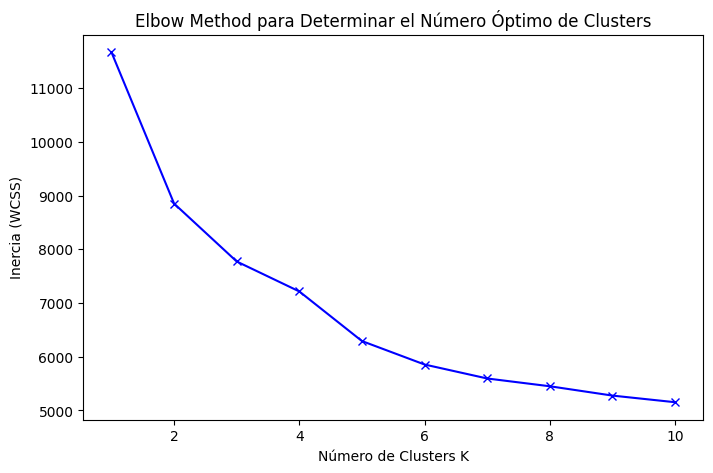

In [157]:
import matplotlib.pyplot as plt
# aplicar el metodo del codo para determinar el numero optimo de clusters

X_train = processed_data


wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Graficar el Método del Codo
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Número de Clusters K')
plt.ylabel('Inercia (WCSS)')
plt.title('Elbow Method para Determinar el Número Óptimo de Clusters')
plt.show()

# Coeficiente de Silueta para determinar K

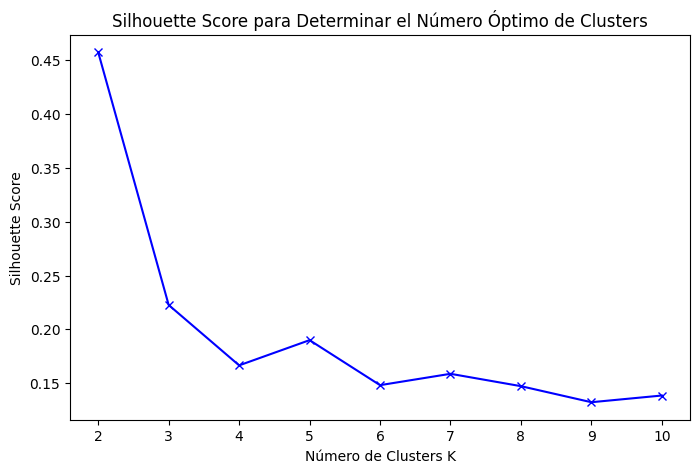

In [158]:
from sklearn.metrics import silhouette_score

X = processed_data

silhouette_scores = []
K = range(2, 11)  # Silhouette Score no está definido para K=1
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    y_kmeans = kmeans.fit_predict(X)
    score = silhouette_score(X, y_kmeans)
    silhouette_scores.append(score)

# Graficar el Coeficiente de Silueta vs K
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Determinar el Número Óptimo de Clusters')
plt.show()


## 7. Aplicar algoritmo de Clustering (K-Means)

In [159]:

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(processed_data)

# Agregar etiquetas de clusters al dataset original
data['Cluster'] = clusters

# Mostrar las primeras filas con los clusters asignados
data.head()


,COD_PERIODO,COD_UTP,TIPO_PRUEBA,PUNTAJE_ICFES,EDAD,ESTRATO,SEXO,TIPO_COLEGIO,ESTADO,BA172,CB115,IS193,IS142,Cluster
0,2018-1,DIURNO,DESPUES_2014,390.0,18,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.6,3.7,5.0,3.9,1
1,2018-1,DIURNO,DESPUES_2014,344.0,17,MEDIO_BAJO,Femenino,OFICIAL,PERMANECE_PROGRAMA,4.2,3.2,4.8,4.9,1
2,2018-1,DIURNO,DESPUES_2014,337.0,18,BAJO,Masculino,OFICIAL,PERMANECE_PROGRAMA,4.0,1.8,3.6,3.6,1
3,2018-2,DIURNO,DESPUES_2014,370.0,18,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.4,4.7,4.7,5.0,1
4,2018-2,DIURNO,DESPUES_2014,330.0,19,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.4,4.0,3.3,4.4,1


## 8. Análisis de resultados

In [160]:

# Revisar distribución de clusters
data['Cluster'].value_counts()


Cluster
1    1193
0     132
Name: count, dtype: int64

## 9. Guardar resultados

In [161]:

# Guardar el dataset con clusters en un archivo Excel
output_file = 'Clustering_with_Clusters.xlsx'
data.to_excel(output_file, index=False)
print(f"Archivo guardado en {output_file}")


Archivo guardado en Clustering_with_Clusters.xlsx


In [162]:
# read the new file
data = pd.read_excel(output_file)
data.head()

,COD_PERIODO,COD_UTP,TIPO_PRUEBA,PUNTAJE_ICFES,EDAD,ESTRATO,SEXO,TIPO_COLEGIO,ESTADO,BA172,CB115,IS193,IS142,Cluster
0,2018-1,DIURNO,DESPUES_2014,390.0,18,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.6,3.7,5.0,3.9,1
1,2018-1,DIURNO,DESPUES_2014,344.0,17,MEDIO_BAJO,Femenino,OFICIAL,PERMANECE_PROGRAMA,4.2,3.2,4.8,4.9,1
2,2018-1,DIURNO,DESPUES_2014,337.0,18,BAJO,Masculino,OFICIAL,PERMANECE_PROGRAMA,4.0,1.8,3.6,3.6,1
3,2018-2,DIURNO,DESPUES_2014,370.0,18,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.4,4.7,4.7,5.0,1
4,2018-2,DIURNO,DESPUES_2014,330.0,19,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.4,4.0,3.3,4.4,1


In [163]:
data_cluster1 = data[data['Cluster'] == 1]
data_cluster0 = data[data['Cluster'] == 0]

data_cluster1.head()

,COD_PERIODO,COD_UTP,TIPO_PRUEBA,PUNTAJE_ICFES,EDAD,ESTRATO,SEXO,TIPO_COLEGIO,ESTADO,BA172,CB115,IS193,IS142,Cluster
0,2018-1,DIURNO,DESPUES_2014,390.0,18,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.6,3.7,5.0,3.9,1
1,2018-1,DIURNO,DESPUES_2014,344.0,17,MEDIO_BAJO,Femenino,OFICIAL,PERMANECE_PROGRAMA,4.2,3.2,4.8,4.9,1
2,2018-1,DIURNO,DESPUES_2014,337.0,18,BAJO,Masculino,OFICIAL,PERMANECE_PROGRAMA,4.0,1.8,3.6,3.6,1
3,2018-2,DIURNO,DESPUES_2014,370.0,18,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.4,4.7,4.7,5.0,1
4,2018-2,DIURNO,DESPUES_2014,330.0,19,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.4,4.0,3.3,4.4,1


# Cluster 0 Vs Cluster 1


In [164]:
data_cluster0.describe()


,PUNTAJE_ICFES,EDAD,BA172,CB115,IS193,IS142,Cluster
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.0
mean,311.918485,18.878788,1.660606,1.477273,1.790152,1.931061,0.0
std,73.581322,3.241031,1.359376,1.241865,1.246544,1.270159,0.0
min,48.290000,16.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,290.000000,17.000000,0.400000,0.500000,0.900000,0.800000,0.0
50%,323.000000,18.000000,1.600000,1.050000,1.200000,1.600000,0.0
75%,352.750000,19.000000,2.300000,2.550000,3.000000,2.400000,0.0
max,382.000000,33.000000,4.600000,3.800000,4.200000,4.600000,0.0


In [165]:
data_cluster1.describe()

,PUNTAJE_ICFES,EDAD,BA172,CB115,IS193,IS142,Cluster
count,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.000000,1193.0
mean,338.304141,18.111484,4.407041,3.589019,4.138810,4.422716,1.0
std,37.480635,1.402949,0.513362,0.917561,0.660659,0.473522,0.0
min,65.210000,16.000000,1.400000,0.100000,0.700000,2.800000,1.0
25%,320.000000,17.000000,4.200000,3.200000,3.700000,4.200000,1.0
50%,345.000000,18.000000,4.400000,3.700000,4.200000,4.500000,1.0
75%,361.000000,18.000000,4.800000,4.200000,4.700000,4.800000,1.0
max,405.000000,30.000000,5.000000,5.000000,5.000000,5.000000,1.0


In [166]:

print(f"Cluster 0: {data_cluster0['ESTRATO'].unique()}")
print(f"Cluster 1: {data_cluster1['ESTRATO'].unique()}")

#create a dataset counting ESTRATO by cluster
data_estrato_cluster0 = data_cluster0['ESTRATO'].value_counts()
data_estrato_cluster1 = data_cluster1['ESTRATO'].value_counts()



data_estrato_cluster = pd.concat([data_estrato_cluster0, data_estrato_cluster1], axis=1)
data_estrato_cluster.columns = ['Cluster 0', 'Cluster 1']
data_estrato_cluster


Cluster 0: ['BAJO' 'BAJO_BAJO' 'MEDIO_BAJO' 'ALTO' 'MEDIO' 'MEDIO_ALTO']
Cluster 1: ['BAJO' 'MEDIO_BAJO' 'MEDIO' 'MEDIO_ALTO' 'BAJO_BAJO' 'ALTO']


,Cluster 0,Cluster 1
ESTRATO,,
BAJO_BAJO,45,181
BAJO,37,505
MEDIO_BAJO,31,309
MEDIO,7,108
ALTO,6,26
MEDIO_ALTO,6,64


In [167]:
print(f"Cluster 0: {data_cluster0['COD_UTP'].unique()}")
print(f"Cluster 1: {data_cluster1['COD_UTP'].unique()}")

data_utp_cluster0 = data_cluster0['COD_UTP'].value_counts()
data_utp_cluster1 = data_cluster1['COD_UTP'].value_counts()

data_utp_cluster = pd.concat([data_utp_cluster0, data_utp_cluster1], axis=1)
data_utp_cluster.columns = ['Cluster 0', 'Cluster 1']
data_utp_cluster

Cluster 0: ['DIURNO' 'NOCTURNO']
Cluster 1: ['DIURNO' 'NOCTURNO']


,Cluster 0,Cluster 1
COD_UTP,,
DIURNO,89,945
NOCTURNO,43,248


In [168]:
data_edad_cluster0 = data_cluster0['EDAD'].value_counts()
data_edad_cluster1 = data_cluster1['EDAD'].value_counts()

data_edad_cluster = pd.concat([data_edad_cluster0, data_edad_cluster1], axis=1)
data_edad_cluster.columns = ['Cluster 0', 'Cluster 1']

# order by index
data_edad_cluster = data_edad_cluster.sort_index()
data_edad_cluster


,Cluster 0,Cluster 1
EDAD,,
16,12.0,27.0
17,28.0,339.0
18,33.0,581.0
19,34.0,118.0
20,17.0,73.0
21,NaN,11.0
22,NaN,19.0
23,NaN,21.0
28,4.0,NaN


In [170]:
import numpy as np

# Calculate mean and std for all variables in cluster 0
mean_cluster0 = data_cluster0.select_dtypes(include=[np.number]).mean()
std_cluster0 = data_cluster0.select_dtypes(include=[np.number]).std()

# # Calculate mean and std for all variables in cluster 1
mean_cluster1 = data_cluster1.select_dtypes(include=[np.number]).mean()
std_cluster1 = data_cluster1.select_dtypes(include=[np.number]).std()

# # Create a dataframe to compare cluster 0 and cluster 1 by all variables mean and std
comparison_df = pd.DataFrame({
    'Cluster 0 Mean': mean_cluster0,
    'Cluster 0 Std': std_cluster0,
    'Cluster 1 Mean': mean_cluster1,
    'Cluster 1 Std': std_cluster1
})

# filter out COD_UTP row
comparison_df = comparison_df.drop(index=['Cluster'])
comparison_df




,Cluster 0 Mean,Cluster 0 Std,Cluster 1 Mean,Cluster 1 Std
PUNTAJE_ICFES,311.918485,73.581322,338.304141,37.480635
EDAD,18.878788,3.241031,18.111484,1.402949
BA172,1.660606,1.359376,4.407041,0.513362
CB115,1.477273,1.241865,3.589019,0.917561
IS193,1.790152,1.246544,4.138810,0.660659
IS142,1.931061,1.270159,4.422716,0.473522


In [171]:
# how to compare cluster 0 and cluster 1 with categorical variables?
# Compare cluster 0 and cluster 1 with categorical variables

# Get the list of categorical columns
categorical_columns = data_cluster0.select_dtypes(include=['object']).columns
# categorical_columns.append('COD_UTP')

# Create a dictionary to store the comparison results
categorical_comparison = {}

# Iterate through each categorical column and calculate the value counts for each cluster
for column in categorical_columns:
    cluster0_counts = data_cluster0[column].value_counts(normalize=True)
    cluster1_counts = data_cluster1[column].value_counts(normalize=True)
    
    # Combine the value counts into a single DataFrame
    comparison = pd.concat([cluster0_counts, cluster1_counts], axis=1, keys=['Cluster 0', 'Cluster 1'])
    
    # Store the comparison DataFrame in the dictionary
    categorical_comparison[column] = comparison

# Display the comparison results for each categorical variable
for column, comparison in categorical_comparison.items():
    print(f"Comparison for {column}:")
    print(comparison)
    print("\n")


Comparison for COD_PERIODO:
             Cluster 0  Cluster 1
COD_PERIODO                      
2021-1        0.310606   0.181894
2021-2        0.234848   0.130763
2019-2        0.181818   0.072925
2020-1        0.106061   0.101425
2023-2        0.083333   0.107293
2022-2        0.045455   0.047779
2022-1        0.037879   0.109807
2023-1             NaN   0.105616
2019-1             NaN   0.053646
2020-2             NaN   0.049455
2018-1             NaN   0.024308
2018-2             NaN   0.015088


Comparison for COD_UTP:
          Cluster 0  Cluster 1
COD_UTP                       
DIURNO     0.674242   0.792121
NOCTURNO   0.325758   0.207879


Comparison for TIPO_PRUEBA:
                        Cluster 0  Cluster 1
TIPO_PRUEBA                                 
DESPUES_2014             0.939394   0.996647
Pruebas Antes del 2014   0.060606   0.003353


Comparison for ESTRATO:
            Cluster 0  Cluster 1
ESTRATO                         
BAJO_BAJO    0.340909   0.151718
BAJO       


# Descripción de Clústeres

## **Clúster 0**

### **Demografía y Antecedentes**
- **Edad:** Los estudiantes de este clúster son generalmente mayores, con una edad promedio de **18.88 años**, en comparación con 18.11 años en el Clúster 1.
- **Género:** Este clúster es predominantemente **masculino**, con **95.45%** de estudiantes hombres y solo **4.55%** mujeres.
- **Estrato Socioeconómico:** Una mayor proporción de estudiantes provienen de los estratos más bajos, con **34.09%** en "BAJO_BAJO" y **28.03%** en "BAJO". Esto indica una representación significativa de contextos económicamente desfavorecidos.

### **Rendimiento Académico**
- **Puntaje ICFES:** Los estudiantes tienen un puntaje promedio más bajo en el ICFES (**311.92**), lo que indica un desempeño general más bajo en esta prueba estandarizada.
- **Calificaciones en Cursos:**
  - **BA172:** 1.66
  - **CB115:** 1.48
  - **IS193:** 1.79
  - **IS142:** 1.93

### **Estado de Matrícula**
- **Retención:** Una proporción significativa (**53.79%**) de estudiantes **no está matriculada (NO_MATRICULADO)** en el programa, y ninguno ha cambiado de programa. Solo **46.21%** permanece en el programa.

### **Periodo Académico y Jornada**
- **Periodos Académicos:** Hay una mayor proporción de estudiantes de periodos anteriores, especialmente **2021-1 (31.06%)** y **2019-2 (18.18%)**.
- **Tipo de Jornada:** Una mayor fracción asiste al programa **nocturno (NOCTURNO)** con **32.58%**, en comparación con 20.79% en el Clúster 1.
- **Tipo de Prueba:** Una proporción ligeramente mayor de estudiantes tomó versiones más antiguas de la prueba, con **6.06%** en "Pruebas Antes del 2014".

### **Antecedentes Educativos**
- **Tipo de Colegio:** Similar al Clúster 1, con **66.67%** de estudiantes provenientes de colegios **oficiales (OFICIAL)** y **33.33%** de colegios privados.

---

## **Clúster 1**

### **Demografía y Antecedentes**
- **Edad:** Los estudiantes son generalmente más jóvenes, con una edad promedio de **18.11 años**.
- **Género:** Aunque también dominado por hombres, este clúster tiene una mayor proporción de **mujeres (14.17%)** en comparación con el Clúster 0.
- **Estrato Socioeconómico:** Los estudiantes provienen principalmente de los estratos **"BAJO" (42.33%)** y **"MEDIO_BAJO" (25.90%)**, lo que indica un nivel socioeconómico ligeramente más alto que en el Clúster 0.

### **Rendimiento Académico**
- **Puntaje ICFES:** Los estudiantes tienen un puntaje promedio más alto en el ICFES (**338.30**), lo que sugiere un mejor desempeño en las pruebas estandarizadas.
- **Calificaciones en Cursos:**
  - **BA172:** 4.41
  - **CB115:** 3.59
  - **IS193:** 4.14
  - **IS142:** 4.42

### **Estado de Matrícula**
- **Retención:** Una abrumadora mayoría (**96.48%**) **permanece matriculada (PERMANECE_PROGRAMA)** en el programa. Solo **2.26%** no está matriculada y **1.26%** ha cambiado de programa.

### **Periodo Académico y Jornada**
- **Periodos Académicos:** Los estudiantes están más distribuidos entre periodos, con mayor representación en periodos recientes como **2022-1 (10.98%)** y **2023-1 (10.56%)**.
- **Tipo de Jornada:** Una mayor proporción asiste al programa **diurno (DIURNO)** con **79.21%**.
- **Tipo de Prueba:** Casi todos los estudiantes (**99.66%**) tomaron la **nueva versión de la prueba (DESPUES_2014)**.

### **Antecedentes Educativos**
- **Tipo de Colegio:** Similar al Clúster 0, con **66.47%** de estudiantes provenientes de colegios **oficiales (OFICIAL)** y **33.53%** de colegios privados.

---

## **Resumen de Diferencias Clave**

- **Rendimiento Académico:** Los estudiantes del Clúster 1 tienen un desempeño académico significativamente mejor, tanto en pruebas estandarizadas como en calificaciones de cursos.
- **Tasas de Retención:** El Clúster 1 tiene una tasa de retención mucho más alta, lo que indica un mejor compromiso o satisfacción con el programa.
- **Estrato Socioeconómico:** El Clúster 0 tiene más estudiantes de los estratos socioeconómicos más bajos, lo que podría correlacionarse con un menor desempeño académico y mayores tasas de deserción.
- **Distribución de Género:** El Clúster 1 tiene una mayor proporción de estudiantes femeninas.
- **Edad y Periodos Académicos:** El Clúster 0 comprende estudiantes ligeramente mayores y está más asociado con periodos académicos anteriores.


# clustering Jerarquico

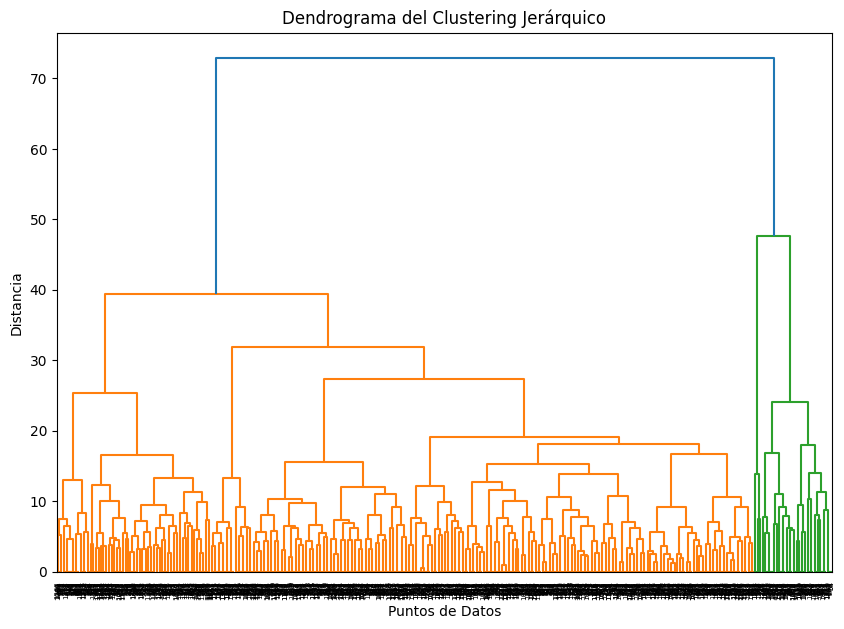

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Realizar linkage
Z = linkage(X, method='ward')

# Plotear el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia')
plt.show()

In [133]:
# Aplicar Agglomerative Clustering con n_clusters=4
agg_cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
clusters = agg_cluster.fit_predict(processed_data)

data['Agglomerative_Cluster'] = clusters

data.head()

,COD_PERIODO,COD_UTP,TIPO_PRUEBA,PUNTAJE_ICFES,EDAD,ESTRATO,SEXO,TIPO_COLEGIO,ESTADO,BA172,CB115,IS193,IS142,Cluster,Agglomerative_Cluster
0,2018-1,28,DESPUES_2014,390.0,18,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.6,3.7,5.0,3.9,1,1
1,2018-1,28,DESPUES_2014,344.0,17,MEDIO_BAJO,Femenino,OFICIAL,PERMANECE_PROGRAMA,4.2,3.2,4.8,4.9,1,1
2,2018-1,28,DESPUES_2014,337.0,18,BAJO,Masculino,OFICIAL,PERMANECE_PROGRAMA,4.0,1.8,3.6,3.6,1,1
3,2018-2,28,DESPUES_2014,370.0,18,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.4,4.7,4.7,5.0,1,1
4,2018-2,28,DESPUES_2014,330.0,19,BAJO,Masculino,PRIVADO,PERMANECE_PROGRAMA,4.4,4.0,3.3,4.4,1,1


In [139]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(processed_data) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

X_principal.head()


,P1,P2
0,1.070889,0.840248
1,0.966649,0.530064
2,-1.065264,0.450747
3,1.693375,0.359914
4,0.176567,-0.396651


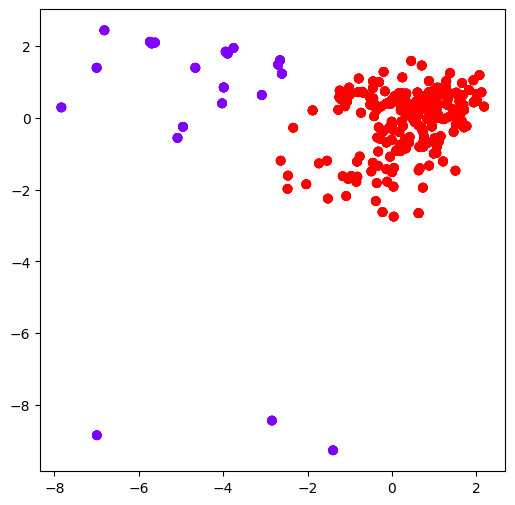

In [140]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 